# Overfitting in DL
* Whenever we are traning a model we will get training data and testing data
* After training data we will get predict function to which while passing testing data it will give answer

**How to identify**

**overfitting**
* If training accuracy is > Testing accuracy  
**Best fitting**
* Training accuracy is almost equall to testing accuracy  
**Under fitting**
* Both Accuracy are very less

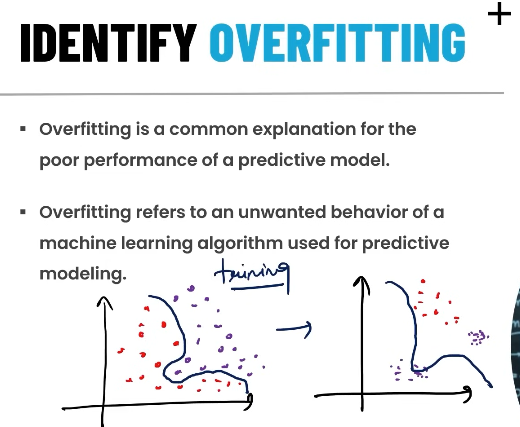

**Ways to improve overffiting**  
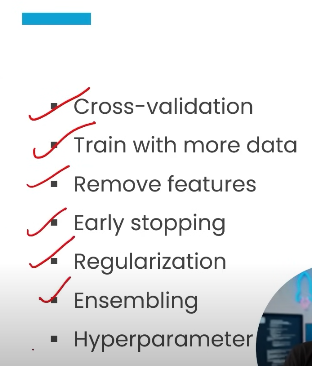

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r'D:\Data Science\Datasets\churn_modelling.csv')
data.drop(columns=['RowNumber','CustomerId','Surname','Geography','Gender','Age'], inplace=True)

In [3]:
data.head(3)

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,2,0.00,1,1,1,101348.88,1
1,608,1,83807.86,1,0,1,112542.58,0
2,502,8,159660.80,3,1,0,113931.57,1


In [4]:
data.isnull().sum()

CreditScore        0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
input_data = data.iloc[:,:-1]
output_data = data['Exited']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train , y_test = train_test_split(input_data,output_data, test_size=0.2,random_state=42) 

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
ss = StandardScaler()
input_data = pd.DataFrame(ss.fit_transform(input_data), columns=input_data.columns)

In [10]:
import tensorflow

In [11]:
from keras.layers import Dense
from keras.models import Sequential

In [12]:
ann = Sequential()

In [13]:
ann.add(Dense(5, input_dim = 7, activation='relu'))
ann.add(Dense(3, input_dim = 7, activation='relu'))
ann.add(Dense(2, input_dim = 7, activation='relu'))
ann.add(Dense(1, input_dim = 7, activation='sigmoid'))

C:\Users\Harsh Narayankar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
ann.fit(x_train, y_train, batch_size=100, epochs=50)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7938 - loss: 2.1544
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7820 - loss: 2.0041
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8016 - loss: 1.5631
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7950 - loss: 1.1877
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7998 - loss: 1.4503
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7929 - loss: 1.2417
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7905 - loss: 1.1058
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7909 - loss: 1.0086
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7982 - loss: 0.9976
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7946 - loss: 1.0395
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7984 - loss: 0.9213
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7872 - lo

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
ann.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.20732586],
       [0.20732586],
       [0.20732586],
       ...,
       [0.20732586],
       [0.20732586],
       [0.20732586]], dtype=float32)

Beacuse this are giving scalar values

In [37]:
prd_test = ann.predict(x_test)
prd_test_data = []
for i in prd_test:
    if i[0] > 0.5:
        prd_test_data.append(1)
    else: 
        prd_test_data.append(0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [38]:
accuracy_score(y_test, prd_data)

0.8035

In [39]:
prd_train = ann.predict(x_train)
prd_train_data = []
for i in prd_train:
    if i[0] > 0.5:
        prd_train_data.append(1)
    else: 
        prd_train_data.append(0)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [40]:
accuracy_score(y_train, prd_train_data)

0.7945

Our model is over fitted

**Early Stopping**
* 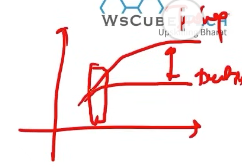
* The upper curv is of training accuracy and the loer curcy is on testin accuracy
* So we we have a point were the train and test accuracy are nearly matching. That is were the model is best fitted 
* y-axis in is incresing in the parameter and training the model

* i.e EarlyStopping will stop the model traing to more epoch when it sees accuracy difference is getting larger

In [26]:
import matplotlib.pyplot as plt

In [41]:
ann.history.history

{'accuracy': [0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798,
  0.7944999933242798

This are the training accuracy

To get for testing

In [52]:
from keras.callbacks import EarlyStopping

In [53]:
ann.fit(x_train, y_train, batch_size=100, epochs=50, validation_data=(x_test, y_test), callbacks = EarlyStopping())

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7962 - loss: 0.5590 - val_accuracy: 0.8035 - val_loss: 1.1536
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7922 - loss: 0.8858 - val_accuracy: 0.8035 - val_loss: 0.4956
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7918 - loss: 0.5219 - val_accuracy: 0.8035 - val_loss: 0.5084


In [54]:
train_accuracy = ann.history.history['accuracy']
test_accuracy = ann.history.history['val_accuracy']

In [57]:
len(test_accuracy)

3

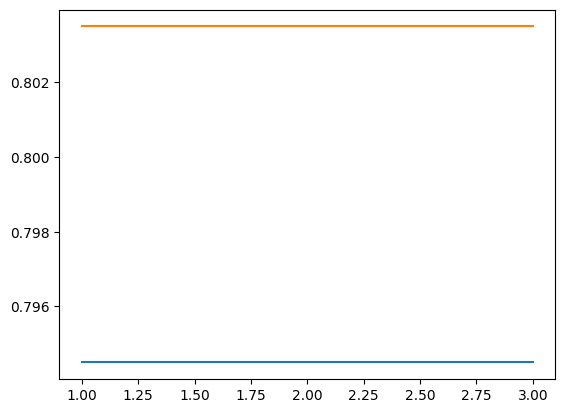

In [58]:
plt.plot([i for i in range(1,4)], train_accuracy)
plt.plot([i for i in range(1,4)], test_accuracy)

**Regulasation**

In [59]:
from keras.regularizers import L2

In [62]:
ann.add(Dense(5, input_dim = 7, activation='relu', kernel_regularizer=L2(l2=0.01)))
ann.add(Dense(3, input_dim = 7, activation='relu'))
ann.add(Dense(2, input_dim = 7, activation='relu'))
ann.add(Dense(1, input_dim = 7, activation='sigmoid'))